In [44]:
fichier = pd.read_csv("Matchs_WTA.csv")
c=fichier.columns
n=fichier.index.size
print("\nLe nombre de joueuses étudiées est :",n)
m=fichier.columns.size
print("\nIl a ",m," variables, qui sont : ",c)


Le nombre de joueuses étudiées est : 2900

Il a  50  variables, qui sont :  Index(['index', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank',
       'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'],
      dtype='object')


In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import scipy.linalg as linalg
import sklearn as skl 
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.colors as cm 
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


--- Étude de la variable surface ---

Tableau des effectifs/fréquences des surfaces : 
          effectifs  fréquences
surface                       
Hard           800    0.275862
Clay           260    0.089655
Grass          134    0.046207


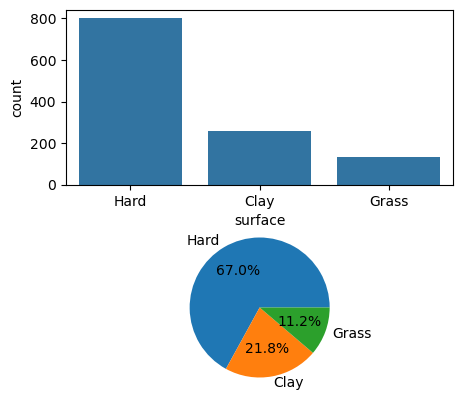

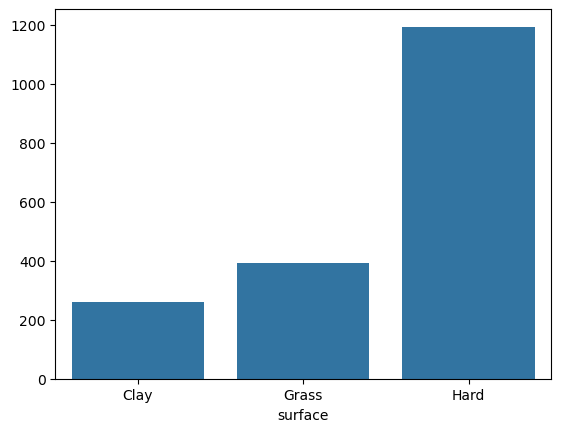

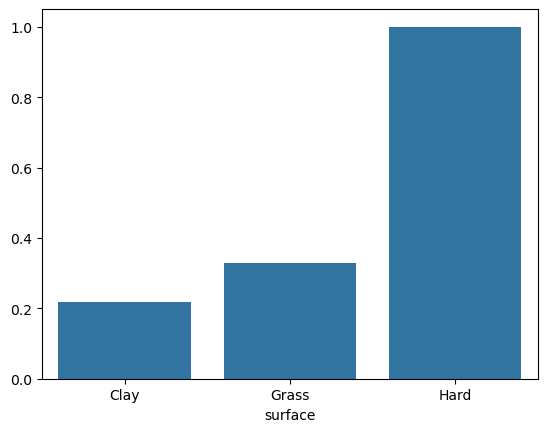

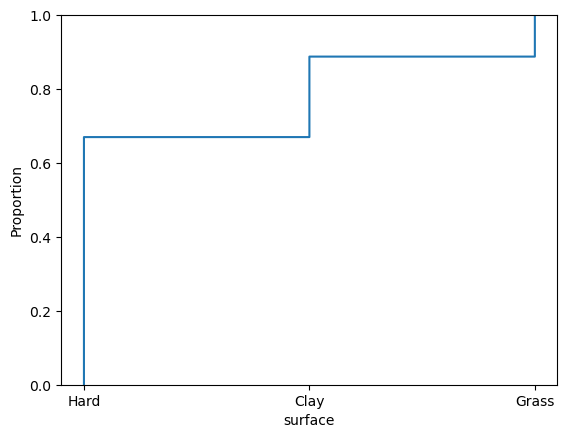

<function matplotlib.pyplot.show(close=None, block=None)>

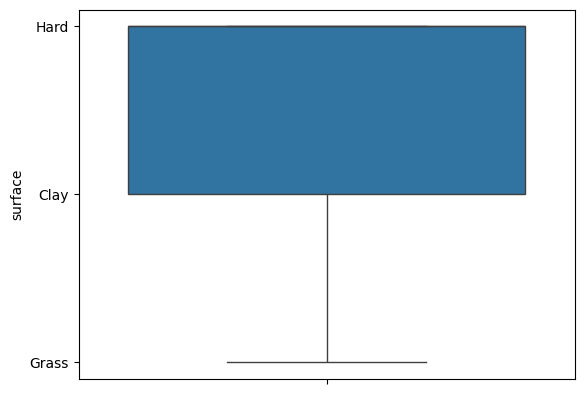

In [73]:
# Étude de la variable surface

print("\n--- Étude de la variable surface ---")

surface_eff=fichier["surface"].value_counts() #effectifs
surface_fre=surface_eff/n  #fréquence
fichier["surface"].value_counts().sort_index()

surface_df=pd.concat([surface_eff, surface_fre], axis=1)  #affichage des fréquences et effectifs
surface_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des surfaces : \n",surface_df)  #suite et fin 

#diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,5))  #diagramme baton effectifs 
sns.countplot(x=fichier["surface"], stat="count", ax=axs[0]) #idem, suite 

axs[1].pie(surface_eff, labels=surface_eff.index, autopct="%1.1f%%") #camembert, autopct fait apparaître les %
plt.show()

surface_cumulé_eff=fichier["surface"].value_counts().sort_index().cumsum()  #cf diagrammes effectis cumulés
surface_cumulé_fre=fichier["surface"].value_counts(normalize=True).sort_index().cumsum() #cf diagramme fréquences cumulées 
sns.barplot(x=surface_cumulé_eff.index, y=surface_cumulé_eff.values) #diagramme batons effectifs cumulés
plt.show()
sns.barplot(x=surface_cumulé_fre.index, y=surface_cumulé_fre.values) #diagramme batons fréquence cumulées
plt.show()

sns.ecdfplot(fichier["surface"]) #fonction de répartition empirique 
plt.show()

sns.boxplot(fichier["surface"], whis=1.5)#boxplot ou boîte à moustache 
plt.show


--- Étude de la variable w_ace ---

Tableau des effectifs/fréquences des w_ace :
        effectifs  fréquences
w_ace                       
0.0          177    0.061034
1.0          210    0.072414
2.0          204    0.070345
3.0          175    0.060345
4.0          121    0.041724
5.0           86    0.029655
6.0           65    0.022414
7.0           44    0.015172
8.0           28    0.009655
9.0           27    0.009310
10.0           9    0.003103
11.0          12    0.004138
12.0          11    0.003793
13.0           7    0.002414
14.0           7    0.002414
15.0           4    0.001379
16.0           3    0.001034
17.0           1    0.000345
18.0           1    0.000345
20.0           1    0.000345
21.0           1    0.000345

Quartile 1, médiane et quartile 3 pour w_ace :  1.0 , 3.0 , 5.0 soit un écart interquartile de 4.0

La moyenne est 3.3073701842546064 , avec pour minimum et maximum 0.0 et 21.0 soit une étendue de 21.0

Le mode de w_ace est : [1.]

La variance et l'

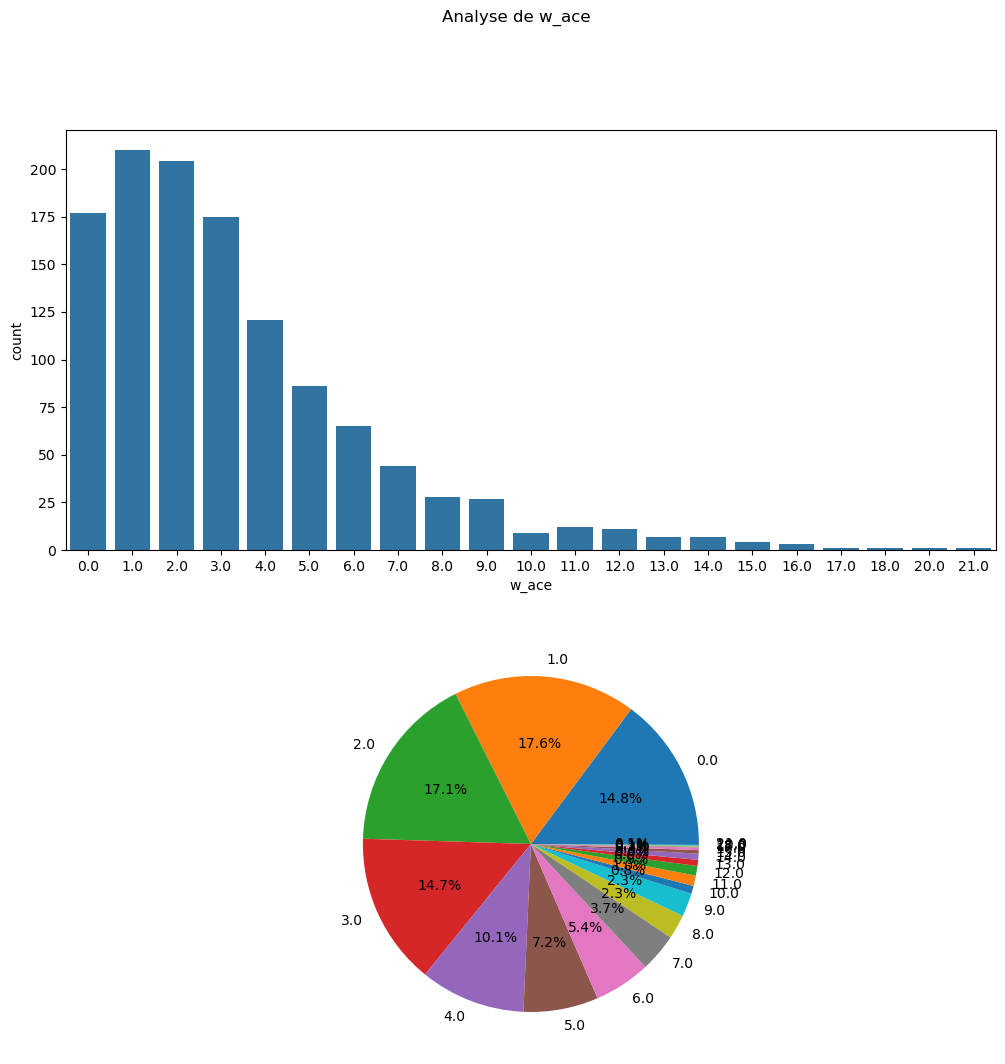

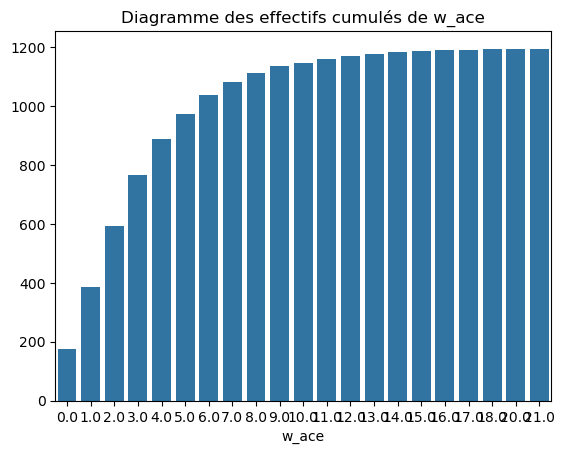

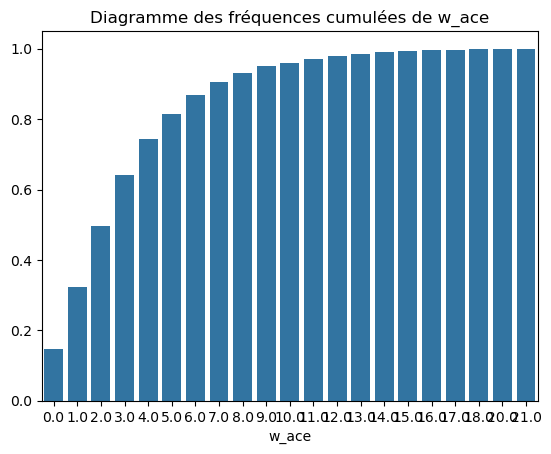

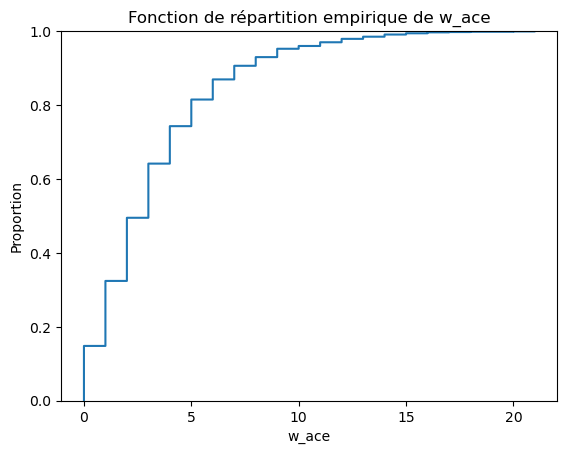

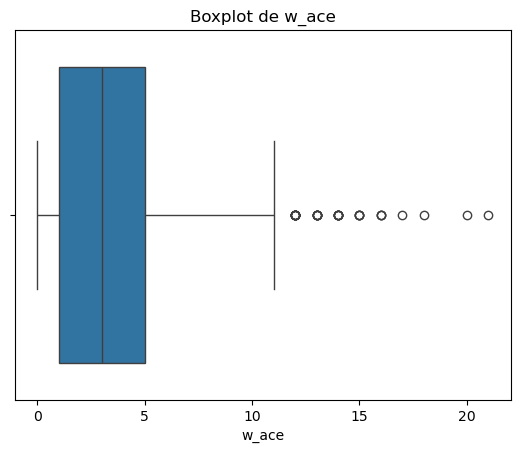

In [75]:
# Étude de la variable w_ace

print("\n--- Étude de la variable w_ace ---")

# Tableau des effectifs et fréquences
wace_eff = fichier["w_ace"].value_counts().sort_index()
wace_fre = wace_eff / n
wace_df = pd.concat([wace_eff, wace_fre], axis=1)
wace_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des w_ace :\n", wace_df)

# Analyses
quart1_wace = fichier["w_ace"].quantile(0.25)
mediane_wace = fichier["w_ace"].median()
quart3_wace = fichier["w_ace"].quantile(0.75)
interquart_wace = quart3_wace - quart1_wace
print("\nQuartile 1, médiane et quartile 3 pour w_ace : ", 
      quart1_wace, ",", mediane_wace, ",", quart3_wace, 
      "soit un écart interquartile de", interquart_wace)

min_wace = fichier["w_ace"].min()
max_wace = fichier["w_ace"].max()
moy_wace = fichier["w_ace"].mean()
etendu_wace = max_wace - min_wace
print("\nLa moyenne est", moy_wace, 
      ", avec pour minimum et maximum", min_wace, "et", max_wace, 
      "soit une étendue de", etendu_wace)

mode_wace = fichier["w_ace"].mode()
print("\nLe mode de w_ace est :", mode_wace.values)

ET_wace = fichier["w_ace"].std(ddof=0)
var_wace = fichier["w_ace"].var(ddof=0)
print("\nLa variance et l'écart-type de w_ace sont respectivement :", var_wace, "et", ET_wace)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
sns.countplot(x=fichier["w_ace"], ax=axs[0])
axs[1].pie(wace_eff, labels=wace_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de w_ace")
plt.show()

wace_cum_eff = wace_eff.sort_index().cumsum()
wace_cum_fre = fichier["w_ace"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=wace_cum_eff.index, y=wace_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de w_ace")
plt.show()

sns.barplot(x=wace_cum_fre.index, y=wace_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de w_ace")
plt.show()

sns.ecdfplot(fichier["w_ace"])
plt.title("Fonction de répartition empirique de w_ace")
plt.show()

sns.boxplot(x=fichier["w_ace"], whis=1.5)
plt.title("Boxplot de w_ace")
plt.show()


--- Étude de la variable minutes ---

Tableau des effectifs/fréquences des minutes :
          effectifs  fréquences
minutes                       
0.0              6    0.002069
33.0             1    0.000345
37.0             1    0.000345
38.0             1    0.000345
40.0             1    0.000345
...            ...         ...
188.0            1    0.000345
189.0            1    0.000345
194.0            1    0.000345
199.0            1    0.000345
218.0            1    0.000345

[149 rows x 2 columns]

Quartile 1, médiane et quartile 3 pour minutes :  70.0 , 85.0 , 112.0 soit un écart interquartile de 42.0

La moyenne est 92.46314907872697 , avec pour minimum et maximum 0.0 et 218.0 soit une étendue de 218.0

Le mode de minutes est : [72.]

La variance et l'écart-type de minutes sont respectivement : 997.1548396645428 et 31.577758623191464


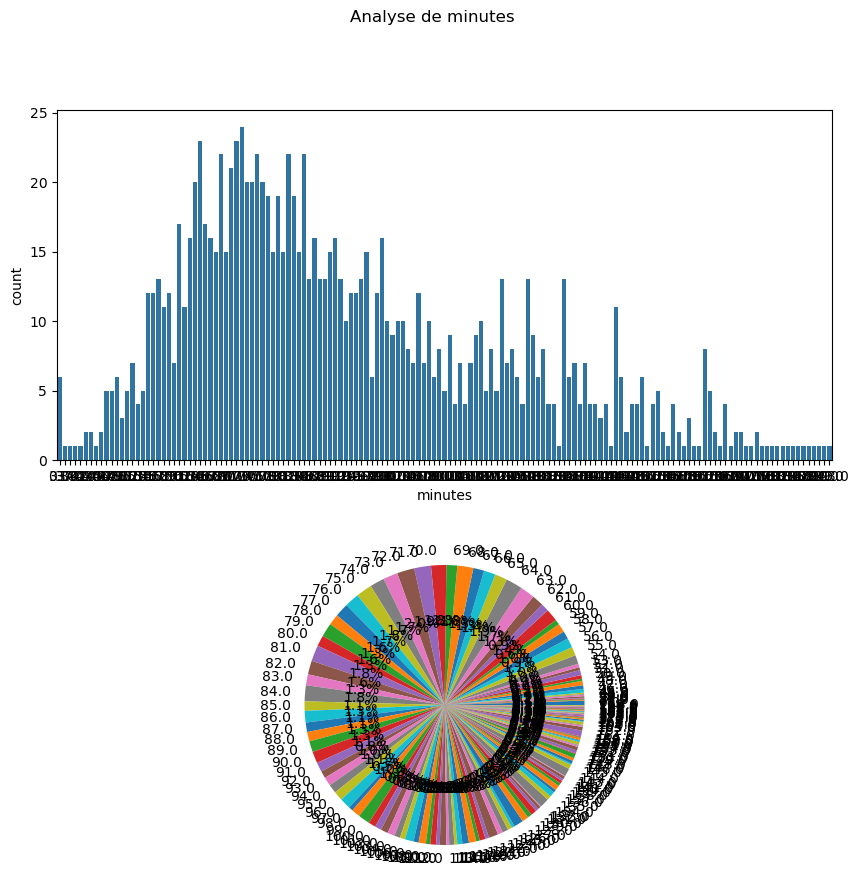

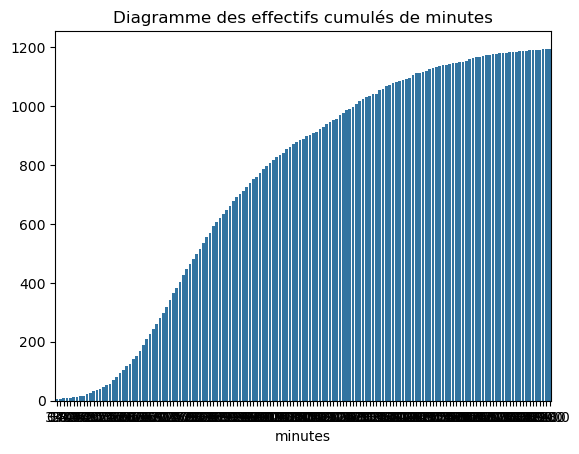

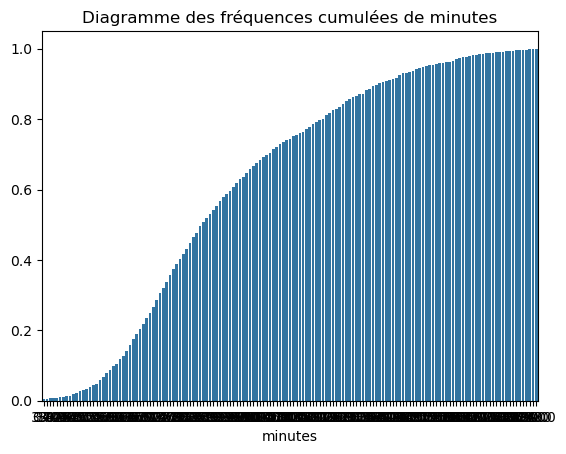

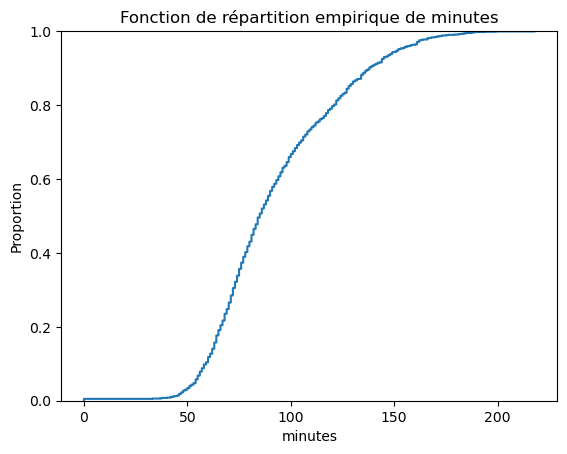

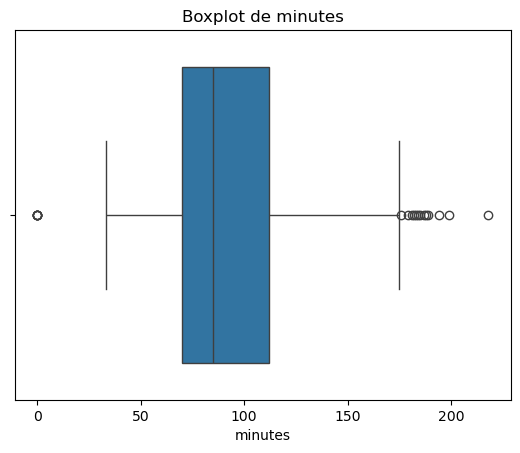

In [76]:
# Étude de la variable minutes

print("\n--- Étude de la variable minutes ---")

# Tableau des effectifs et fréquences
minutes_eff = fichier["minutes"].value_counts().sort_index()
minutes_fre = minutes_eff / n
minutes_df = pd.concat([minutes_eff, minutes_fre], axis=1)
minutes_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des minutes :\n", minutes_df)

# Analyses
quart1_minutes = fichier["minutes"].quantile(0.25)
mediane_minutes = fichier["minutes"].quantile(0.5)
quart3_minutes = fichier["minutes"].quantile(0.75)
interquart_minutes = quart3_minutes - quart1_minutes
print("\nQuartile 1, médiane et quartile 3 pour minutes : ", 
      quart1_minutes, ",", mediane_minutes, ",", quart3_minutes, 
      "soit un écart interquartile de", interquart_minutes)

min_minutes = fichier["minutes"].min()
max_minutes = fichier["minutes"].max()
moy_minutes = fichier["minutes"].mean()
etendu_minutes = max_minutes - min_minutes
print("\nLa moyenne est", moy_minutes, 
      ", avec pour minimum et maximum", min_minutes, "et", max_minutes, 
      "soit une étendue de", etendu_minutes)

mode_minutes = fichier["minutes"].mode()
print("\nLe mode de minutes est :", mode_minutes.values)

ET_minutes = fichier["minutes"].std(ddof=0)
var_minutes = fichier["minutes"].var(ddof=0)
print("\nLa variance et l'écart-type de minutes sont respectivement :", var_minutes, "et", ET_minutes)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.countplot(x=fichier["minutes"], ax=axs[0])
axs[1].pie(minutes_eff, labels=minutes_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de minutes")
plt.show()

minutes_cum_eff = minutes_eff.sort_index().cumsum()
minutes_cum_fre = fichier["minutes"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=minutes_cum_eff.index, y=minutes_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de minutes")
plt.show()

sns.barplot(x=minutes_cum_fre.index, y=minutes_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de minutes")
plt.show()

sns.ecdfplot(fichier["minutes"])
plt.title("Fonction de répartition empirique de minutes")
plt.show()

sns.boxplot(x=fichier["minutes"], whis=1.5)
plt.title("Boxplot de minutes")
plt.show()


--- Étude de la variable seed (winner_seed) ---
Quartile 1, médiane et quartile 3 pour winner_seed : 3.0 , 6.0 , 10.0

Quartile 1, médiane et quartile 3 pour winner_seed :  3.0 , 6.0 , 10.0 soit un écart interquartile de 7.0

La moyenne est 7.535175879396985 , avec pour minimum et maximum 1.0 et 32.0 soit une étendue de 31.0

Le mode de winner_seed est : [1.]

La variance et l'écart-type de winner_seed sont respectivement : 40.670873210272376 et 6.377371967375932


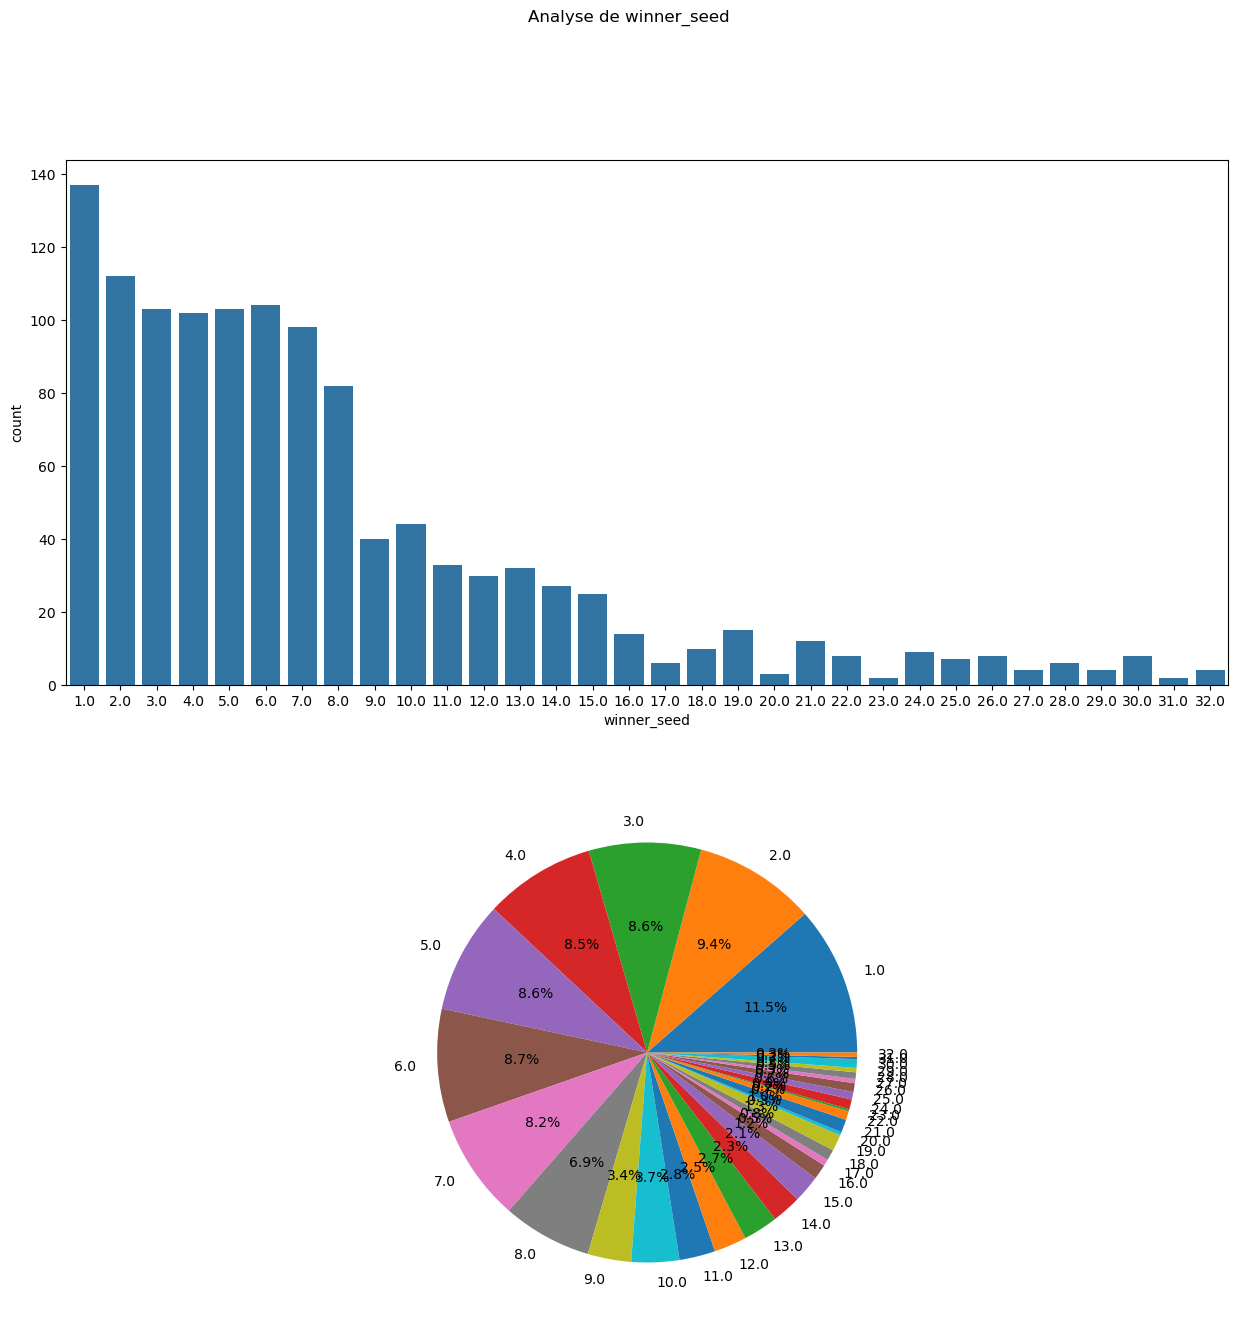

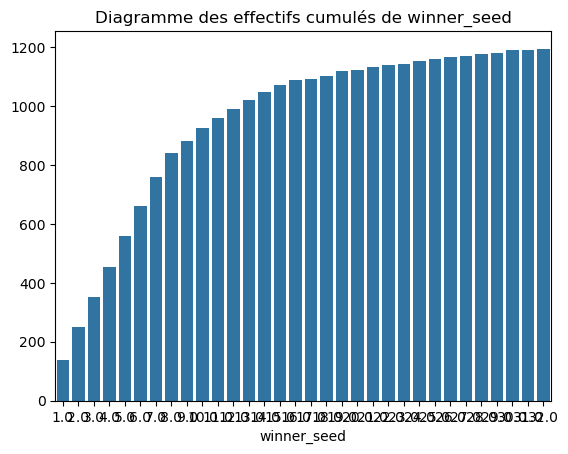

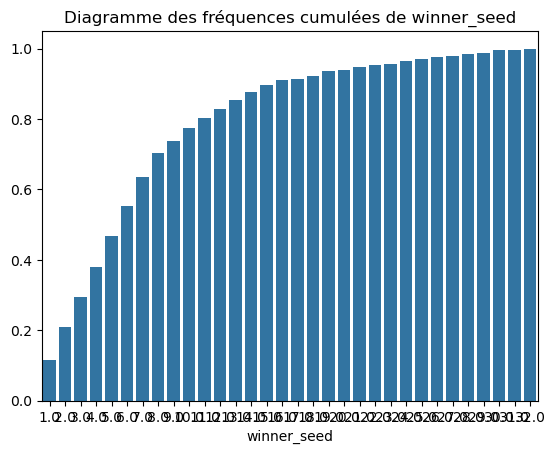

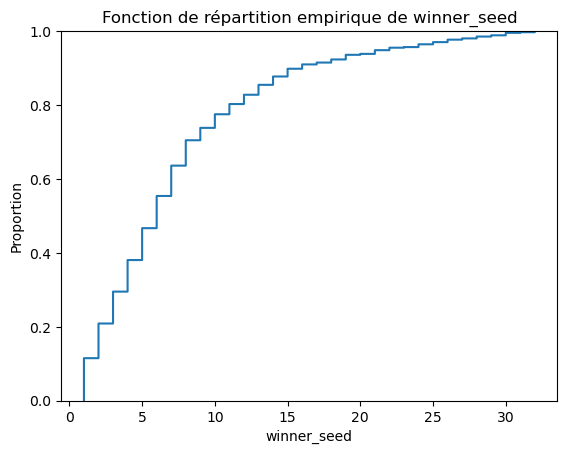

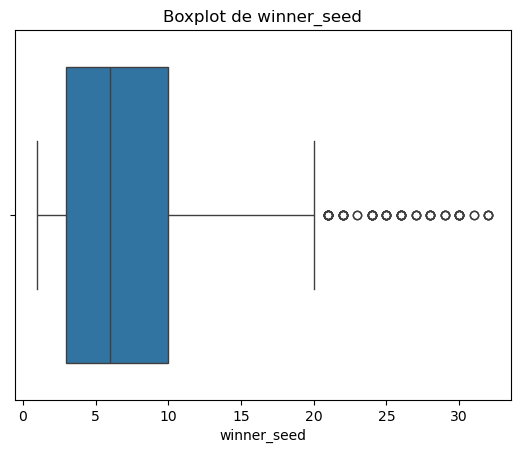

In [77]:
# Étude de la variable seed (winner_seed)


print("\n--- Étude de la variable seed (winner_seed) ---")
# Convertir la série 'winner_seed' en numérique, pour les Q, qui n'ont pas de numéros, juste une lettre 
fichier['winner_seed'] = pd.to_numeric(fichier['winner_seed'], errors='coerce')
seed_eff = fichier["winner_seed"].value_counts().sort_index()
seed_fre = seed_eff/n

# Supprimer les lignes avec des valeurs incor
fichier = fichier.dropna(subset=['winner_seed'])

# Maintenant vous pouvez calculer les quantiles sans erreurs
quart1_seed = fichier["winner_seed"].quantile(0.25)
mediane_seed = fichier["winner_seed"].median()
quart3_seed = fichier["winner_seed"].quantile(0.75)

print(f"Quartile 1, médiane et quartile 3 pour winner_seed : {quart1_seed} , {mediane_seed} , {quart3_seed}")
interquart_seed = quart3_seed - quart1_seed
print("\nQuartile 1, médiane et quartile 3 pour winner_seed : ", 
      quart1_seed, ",", mediane_seed, ",", quart3_seed, 
      "soit un écart interquartile de", interquart_seed)

min_seed = fichier["winner_seed"].min()
max_seed = fichier["winner_seed"].max()
moy_seed = fichier["winner_seed"].mean()
etendu_seed = max_seed - min_seed
print("\nLa moyenne est", moy_seed, 
      ", avec pour minimum et maximum", min_seed, "et", max_seed, 
      "soit une étendue de", etendu_seed)

mode_seed = fichier["winner_seed"].mode()
print("\nLe mode de winner_seed est :", mode_seed.values)

ET_seed = fichier["winner_seed"].std(ddof=0)
var_seed = fichier["winner_seed"].var(ddof=0)
print("\nLa variance et l'écart-type de winner_seed sont respectivement :", var_seed, "et", ET_seed)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
sns.countplot(x=fichier["winner_seed"], ax=axs[0])
axs[1].pie(seed_eff, labels=seed_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de winner_seed")
plt.show()

seed_cum_eff = seed_eff.sort_index().cumsum()
seed_cum_fre = fichier["winner_seed"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=seed_cum_eff.index, y=seed_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de winner_seed")
plt.show()

sns.barplot(x=seed_cum_fre.index, y=seed_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de winner_seed")
plt.show()

sns.ecdfplot(fichier["winner_seed"])
plt.title("Fonction de répartition empirique de winner_seed")
plt.show()

sns.boxplot(x=fichier["winner_seed"], whis=1.5)
plt.title("Boxplot de winner_seed")
plt.show()

Table de contingence :
tourney_level    G    I   P
draw_size                  
8                0   15   0
12               0   12   0
32               0  568   0
64               0  163  95
128            256    0  85


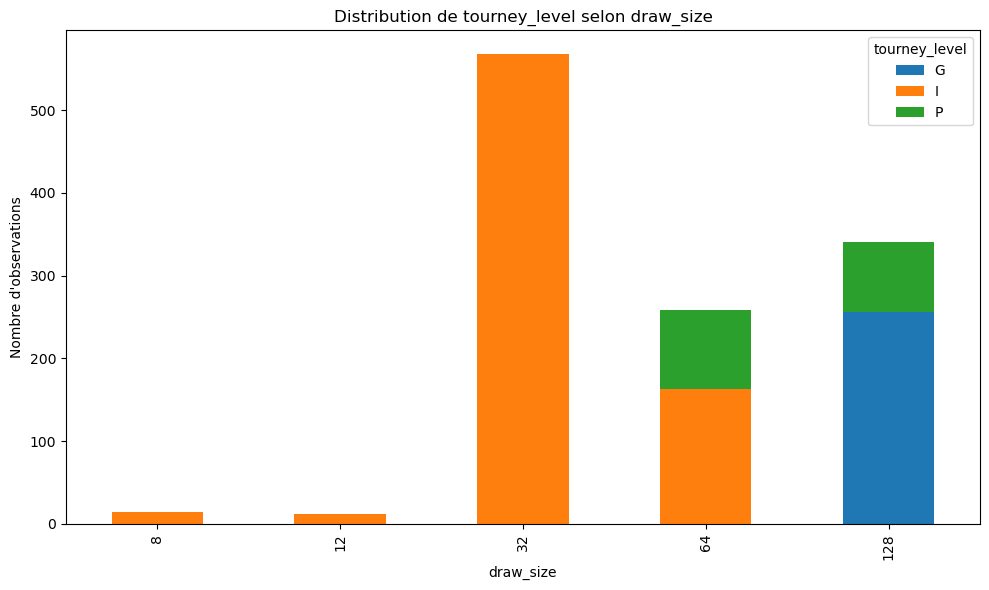

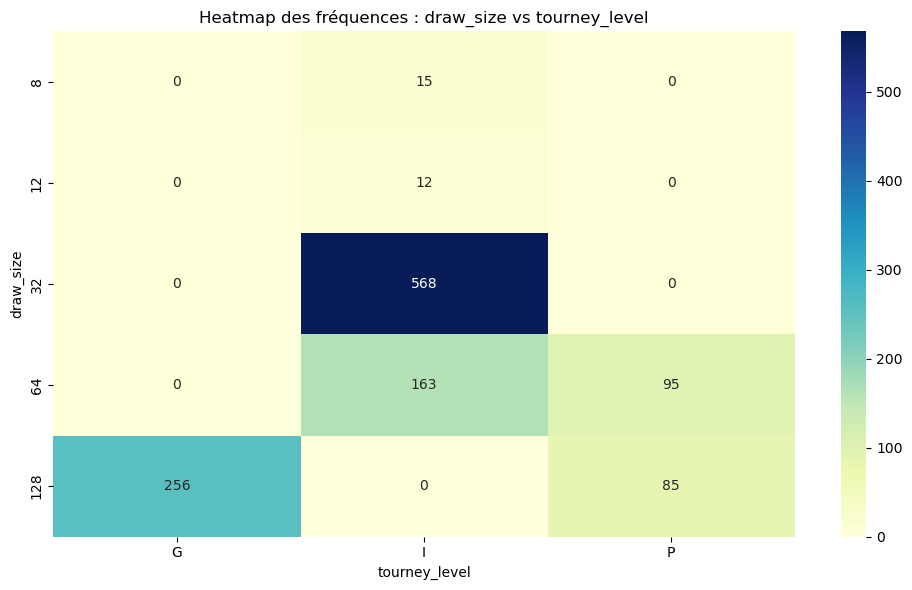

In [78]:
# Table de contingence
table = pd.crosstab(fichier['draw_size'], fichier['tourney_level'])
print("Table de contingence :")
print(table)

# Visualisation
table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution de tourney_level selon draw_size")
plt.xlabel("draw_size")
plt.ylabel("Nombre d'observations")
plt.legend(title="tourney_level")
plt.tight_layout()
plt.show()

# Afficher la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title("Heatmap des fréquences : draw_size vs tourney_level")
plt.xlabel("tourney_level")
plt.ylabel("draw_size")
plt.tight_layout()
plt.show()


Statistiques descriptives de winner_seed par draw_size :
           count       mean       std  min  25%   50%    75%   max
draw_size                                                         
8           15.0   4.200000  2.782599  1.0  1.5   4.0   7.00   8.0
12          12.0   4.833333  3.563281  1.0  3.0   3.5   6.25  12.0
32         568.0   4.422535  2.428008  1.0  2.0   4.0   6.00  10.0
64         258.0   8.224806  4.462102  1.0  4.0   8.0  11.00  17.0
128        341.0  12.439883  8.705985  1.0  5.0  12.0  19.00  32.0


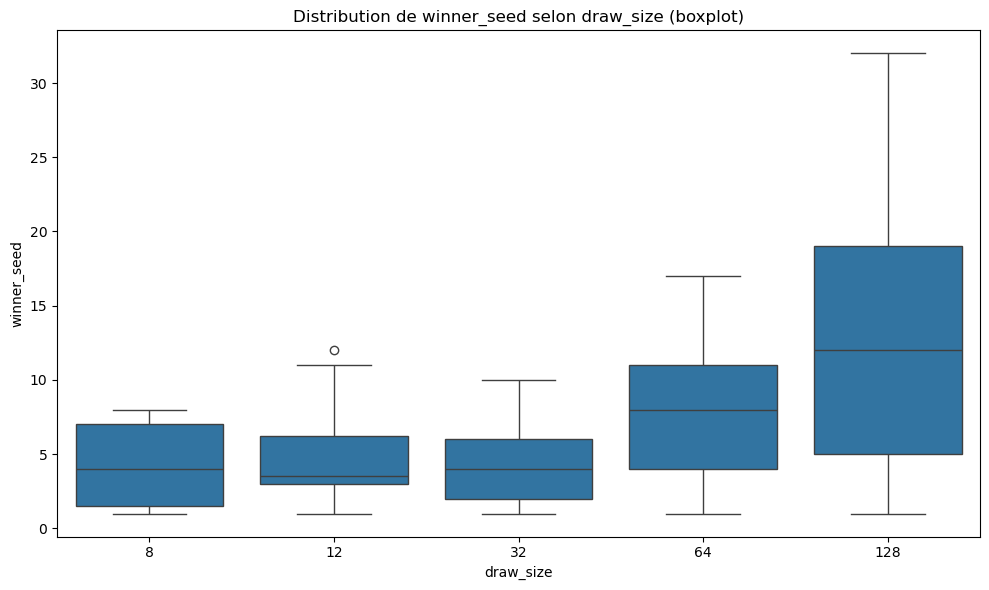

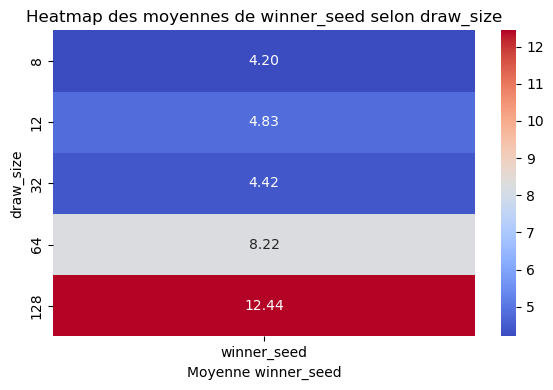

In [79]:
# S'assurer que winner_seed est bien numérique
fichier['winner_seed'] = pd.to_numeric(fichier['winner_seed'], errors='coerce')

# 1. Statistiques descriptives par catégorie de draw_size
stats = fichier.groupby('draw_size')['winner_seed'].describe()
print("Statistiques descriptives de winner_seed par draw_size :")
print(stats)

# 2. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='draw_size', y='winner_seed', data=fichier)
plt.title("Distribution de winner_seed selon draw_size (boxplot)")
plt.xlabel("draw_size")
plt.ylabel("winner_seed")
plt.tight_layout()
plt.show()

# 3. Heatmap des moyennes de winner_seed par draw_size
mean_values = fichier.groupby('draw_size')['winner_seed'].mean().reset_index()
heatmap_data = mean_values.pivot_table(index='draw_size', values='winner_seed')

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap des moyennes de winner_seed selon draw_size")
plt.ylabel("draw_size")
plt.xlabel("Moyenne winner_seed")
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.777
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0164
Time:                        10:17:38   Log-Likelihood:                -5813.6
No. Observations:                1194   AIC:                         1.163e+04
Df Residuals:                    1192   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          89.8720      1.412     63.633      

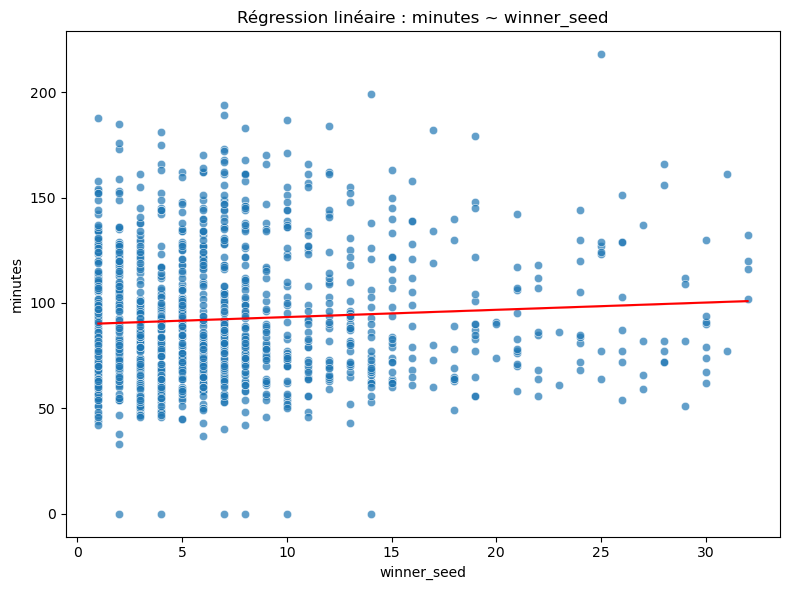

In [80]:
# S'assurer que les variables sont bien numériques
fichier['winner_seed'] = pd.to_numeric(fichier['winner_seed'], errors='coerce')
fichier['minutes'] = pd.to_numeric(fichier['minutes'], errors='coerce')

# Retirer à nouveau les lignes avec NaN après conversion
fichier.dropna(subset=['winner_seed', 'minutes'], inplace=True)

# Définir les variables
X = fichier['winner_seed']
y = fichier['minutes']

# Ajouter une constante pour l'interception
X_const = sm.add_constant(X)

# Régression linéaire
model = sm.OLS(y, X_const).fit()

# Résumé du modèle
print(model.summary())

# Visualisation avec la droite de régression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, alpha=0.7)
sns.lineplot(x=X, y=model.predict(X_const), color='red')
plt.title("Régression linéaire : minutes ~ winner_seed")
plt.xlabel("winner_seed")
plt.ylabel("minutes")
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.283
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0379
Time:                        10:17:42   Log-Likelihood:                -5813.2
No. Observations:                1194   AIC:                         1.163e+04
Df Residuals:                    1191   BIC:                         1.165e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  87.7413    

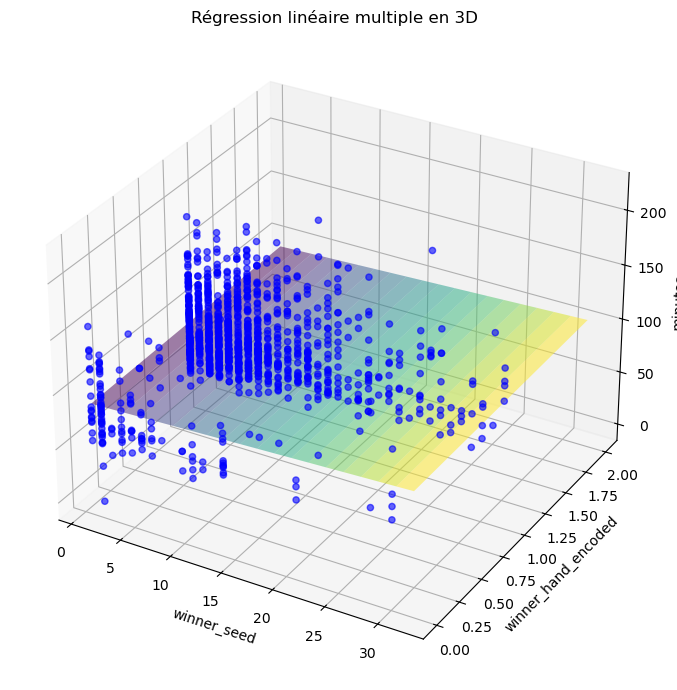

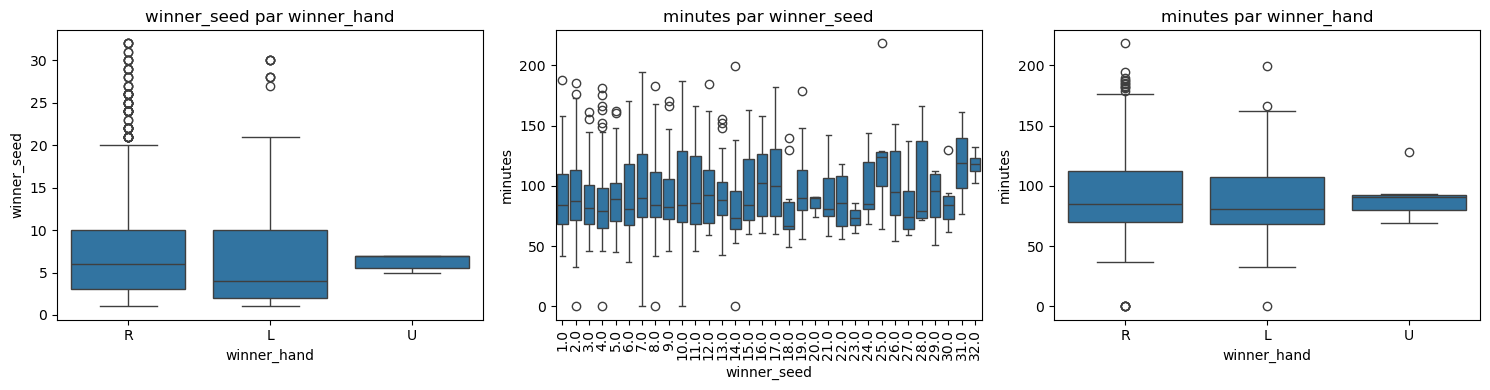

In [81]:

# Conversion des types
fichier['winner_seed'] = pd.to_numeric(fichier['winner_seed'], errors='coerce')
fichier['minutes'] = pd.to_numeric(fichier['minutes'], errors='coerce')


# Encodage de winner_hand (par exemple : 'R' -> 0, 'L' -> 1)
fichier['winner_hand_encoded'] = fichier['winner_hand'].astype('category').cat.codes

# Variables
X = fichier[['winner_seed', 'winner_hand_encoded']]
y = fichier['minutes']

# Ajouter constante
X_const = sm.add_constant(X)

# Régression multiple
model = sm.OLS(y, X_const).fit()
print(model.summary())

# 📊 Visualisation 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1 = fichier['winner_seed']
x2 = fichier['winner_hand_encoded']
z = fichier['minutes']

# Plan de régression
x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 20),
                               np.linspace(x2.min(), x2.max(), 2))
X_pred = pd.DataFrame({
    'const': 1,
    'winner_seed': x1_grid.ravel(),
    'winner_hand_encoded': x2_grid.ravel()
})
z_pred = model.predict(X_pred).values.reshape(x1_grid.shape)

# Nuage de points
ax.scatter(x1, x2, z, color='blue', alpha=0.6)
# Plan
ax.plot_surface(x1_grid, x2_grid, z_pred, alpha=0.5, cmap='viridis')

ax.set_xlabel("winner_seed")
ax.set_ylabel("winner_hand_encoded")
ax.set_zlabel("minutes")
ax.set_title("Régression linéaire multiple en 3D")

plt.tight_layout()
plt.show()

# Boxplots 
plt.figure(figsize=(15, 4))

# Boxplot 1 : winner_hand vs winner_seed
plt.subplot(1, 3, 1)
sns.boxplot(x='winner_hand', y='winner_seed', data=fichier)
plt.title("winner_seed par winner_hand")

# Boxplot 2 : winner_seed vs minutes
plt.subplot(1, 3, 2)
sns.boxplot(x='winner_seed', y='minutes', data=fichier)
plt.xticks(rotation=90)
plt.title("minutes par winner_seed")

# Boxplot 3 : winner_hand vs minutes
plt.subplot(1, 3, 3)
sns.boxplot(x='winner_hand', y='minutes', data=fichier)
plt.title("minutes par winner_hand")

plt.tight_layout()
plt.show()

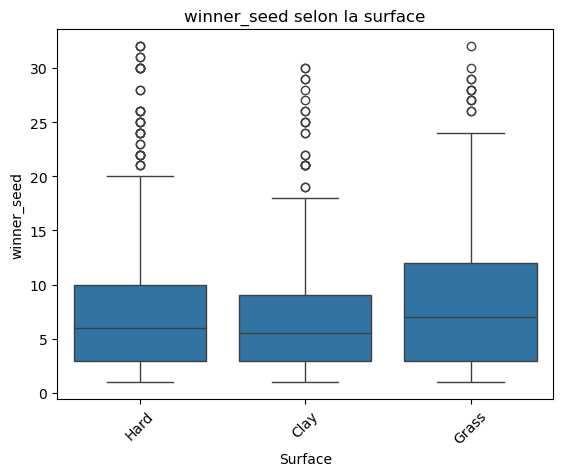

In [99]:
# Visualisation : boxplot de winner_seed selon surface
sns.boxplot(data=fichier, x='surface', y='winner_seed')
plt.title("winner_seed selon la surface")
plt.xlabel("Surface")
plt.ylabel("winner_seed")
plt.xticks(rotation=45)
plt.show()




Tableau de contingence (nombres) :
winner_hand   L    R  U
surface                
Clay         28  228  4
Grass        14  120  0
Hard         99  699  2

Tableau de contingence (fréquences en %) :
winner_hand     L      R     U
surface                       
Clay         2.35  19.10  0.34
Grass        1.17  10.05  0.00
Hard         8.29  58.54  0.17


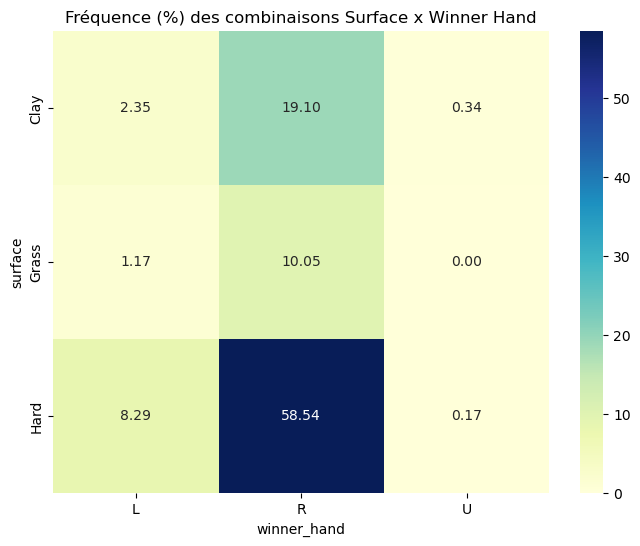

In [103]:
# Tableau de contingence - NOMBRES
table_n = pd.crosstab(fichier['surface'], fichier['winner_hand'])
print("\nTableau de contingence (nombres) :")
print(table_n)

# Tableau de contingence - FRÉQUENCES
table_f = pd.crosstab(fichier['surface'], fichier['winner_hand'], normalize='all') * 100
print("\nTableau de contingence (fréquences en %) :")
print(table_f.round(2))

# Visualisation : heatmap avec les FRÉQUENCES
plt.figure(figsize=(8, 6))
sns.heatmap(table_f, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Fréquence (%) des combinaisons Surface x Winner Hand")
plt.xlabel("winner_hand")
plt.ylabel("surface")
plt.show()